In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/HR%20Analytics/ibm-hr-analytics-employee-attrition-performance.zip?raw=true'
data = pd.read_csv(url, compression='zip')

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [2]:
# Handle missing values
# Since the initial exploration showed no missing values, we can proceed without imputation.
# If there were missing values, we would handle them accordingly, for example:
# data.fillna(method='ffill', inplace=True)

# Encode categorical variables
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_cols}")

# Use one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Numerical Columns: {numerical_cols}")

# Standardize numerical columns
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the first few rows of the preprocessed dataset
print(data_encoded.head())

# Check the shape of the dataset after encoding
print(f"Shape of the dataset after encoding: {data_encoded.shape}")


Categorical Columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Numerical Columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
        Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350   0.742527         -1.010909  -0.891688            0.0   
1  1.322365  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343   1.

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the feature columns and target variable
X = data_encoded.drop(columns=['Attrition_Yes'])  # Assuming 'Attrition' was one of the encoded columns
y = data_encoded['Attrition_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

       False       0.88      1.00      0.93       255
        True       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
[[254   1]
 [ 35   4]]


Top 10 Most Important Features:
              Feature  Importance
11      MonthlyIncome    0.071784
46       OverTime_Yes    0.061896
1           DailyRate    0.054603
5      EmployeeNumber    0.049249
0                 Age    0.048570
19  TotalWorkingYears    0.047738
12        MonthlyRate    0.047392
7          HourlyRate    0.041425
2    DistanceFromHome    0.040048
22     YearsAtCompany    0.036038


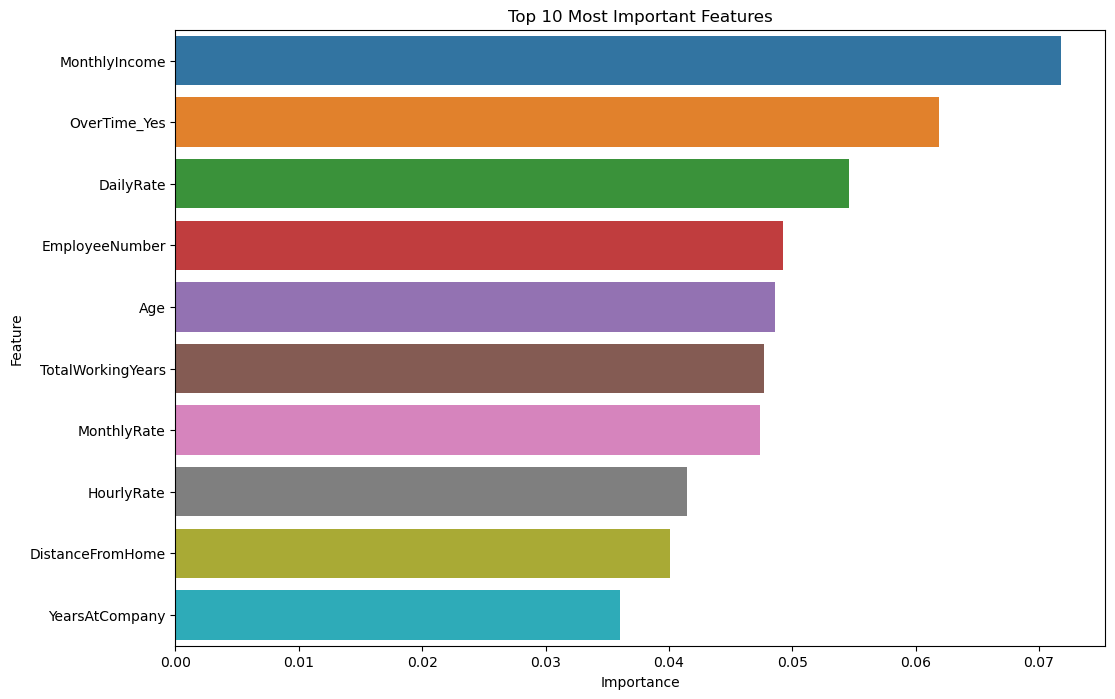

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
feature_importances = clf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with Best Parameters: {accuracy_best:.2f}")

# Display the classification report with the best parameters
print("Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_best))

# Display the confusion matrix with the best parameters
print("Confusion Matrix with Best Parameters:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
